In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
import regex as re

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# TODO

- After solving data leakage problem train the models again with the same parameters that are used for intermediate report results

---

## Modeling again with the updated dataset

In [0]:
def pipeline(model, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    rmse_score = np.sqrt(mean_squared_error(y_test, preds))
    mape_score = mean_absolute_percentage_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    
    return rmse_score, mape_score, r2

In [0]:
train = pd.read_csv("datasets/main_ordinal_updated_train.csv")
test = pd.read_csv("datasets/main_ordinal_updated_test.csv")
# this import was done in the platform that I used
# train = pd.read_csv("/dbfs/FileStore/hakan/main_ordinal_updated_train.csv")
# test = pd.read_csv("/dbfs/FileStore/hakan/main_ordinal_updated_test.csv")

X_train = train.drop(columns=["price"])
X_test = test.drop(columns=["price"])

y_train = train["price"]
y_test = test["price"]

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(f"Shape of the train set: {X_train.shape} {y_train.shape}")
print(f"Shape of the test set: {X_test.shape} {y_test.shape}")

Shape of the train set: (156544, 18) (156544,)
Shape of the test set: (39136, 18) (39136,)


In [0]:
model_scores = {}

## ElasticNetCV

In [0]:
elastic = ElasticNetCV(l1_ratio=1, eps=0.0001)

rmse, mape, r2 = pipeline(elastic, X_train, X_test, y_train, y_test)

model_scores["ElasticNet"] = [rmse, mape, r2]
model_scores["ElasticNet"]

[288.246683145899, 0.20094127162690023, 0.533674199122903]

## SVR

In [0]:
svreg = SVR(verbose=True)

rmse, mape, r2 = pipeline(svreg, X_train, X_test, y_train, y_test)

model_scores["SVR"] = [rmse, mape, r2]
model_scores["SVR"]

[LibSVM]

[292.1528725214565, 0.1853920553941745, 0.5209496860172249]

## KNN

In [0]:
knn = KNeighborsRegressor(n_neighbors=50)

rmse, mape, r2 = pipeline(knn, X_train, X_test, y_train, y_test)

model_scores["KNN"] = [rmse, mape, r2]
model_scores["KNN"]

[261.2451140159557, 0.1641476931189698, 0.6169485055272962]

## Decision Tree

In [0]:
tree = DecisionTreeRegressor()

rmse, mape, r2 = pipeline(tree, X_train, X_test, y_train, y_test)

model_scores["DecisionTree"] = [rmse, mape, r2]
model_scores["DecisionTree"]

[179.38075424732617, 0.07400143623981525, 0.8194021818535828]

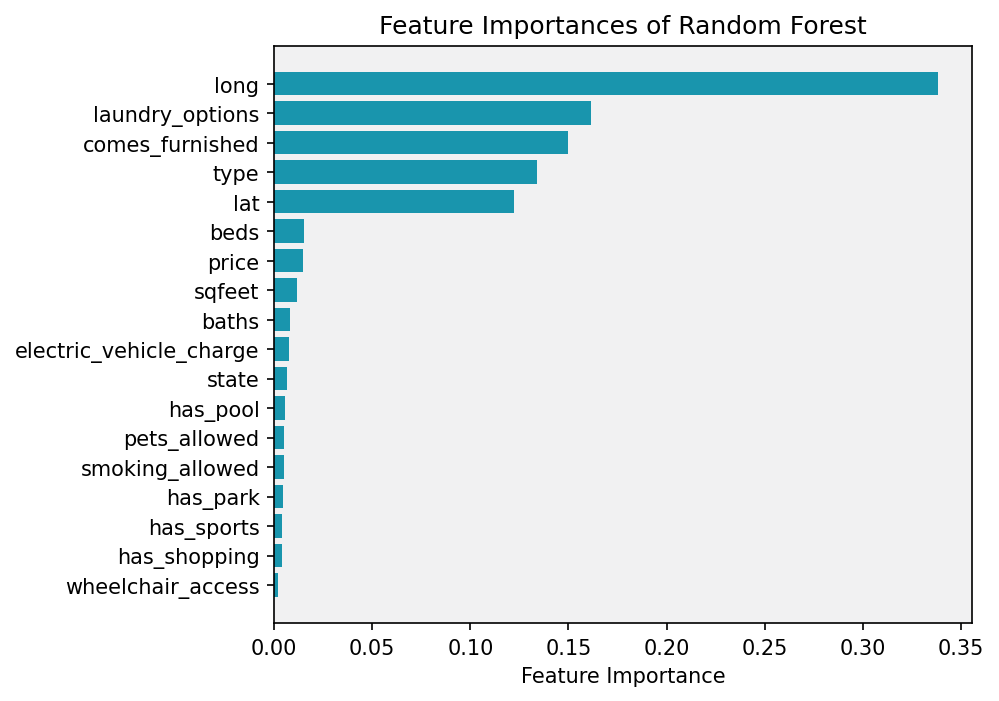

In [0]:
importances = pd.Series({i:j for i,j in zip(train.columns, tree.feature_importances_)}).sort_values()

fig, ax = plt.subplots(figsize=(6,5), dpi=150)
ax.set_facecolor("#f1f1f2")

plt.barh(importances.index, importances.values, color="#1995ad")
plt.title("Feature Importances of Random Forest")
plt.xlabel("Feature Importance");

## RandomForest

In [0]:
rf = RandomForestRegressor(n_estimators=150, verbose=2)

rmse, mape, r2 = pipeline(rf, X_train, X_test, y_train, y_test)

model_scores["RandomForest"] = [rmse, mape, r2]
model_scores["RandomForest"]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 150


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    7.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    7.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.1s finished


[133.46103722002366, 0.0625068575236226, 0.9000299753710782]

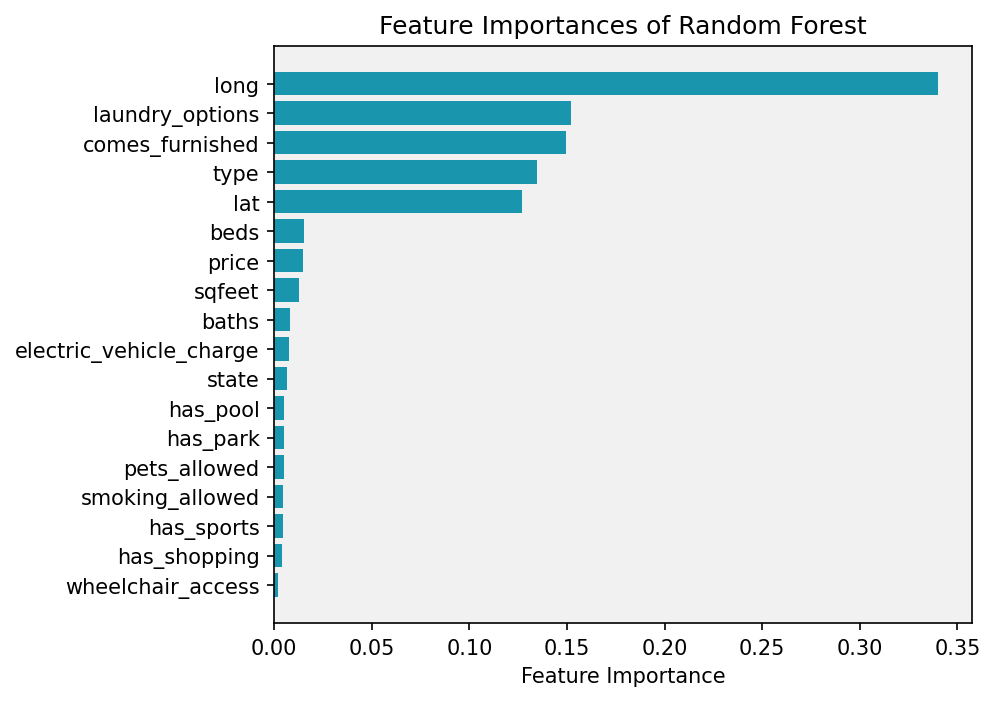

In [0]:
importances = pd.Series({i:j for i,j in zip(train.columns, rf.feature_importances_)}).sort_values()

fig, ax = plt.subplots(figsize=(6,5), dpi=150)
ax.set_facecolor("#f1f1f2")

plt.barh(importances.index, importances.values, color="#1995ad")
plt.title("Feature Importances of Random Forest")
plt.xlabel("Feature Importance");

## AdaBoost

In [0]:
ada = AdaBoostRegressor(learning_rate=0.1)

rmse, mape, r2 = pipeline(ada, X_train, X_test, y_train, y_test)

model_scores["AdaBoost"] = [rmse, mape, r2]
model_scores["AdaBoost"]

[297.0253405868972, 0.22568126059247223, 0.5048374250311453]

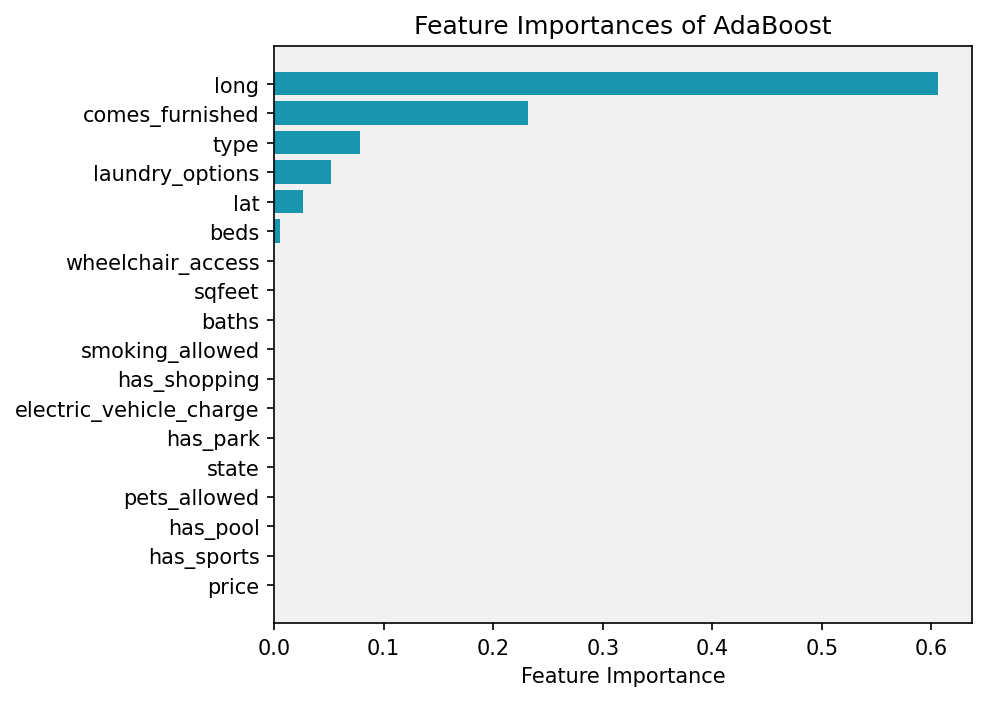

In [0]:
importances = pd.Series({i:j for i,j in zip(train.columns, ada.feature_importances_)}).sort_values()

fig, ax = plt.subplots(figsize=(6,5), dpi=150)
ax.set_facecolor("#f1f1f2")

plt.barh(importances.index, importances.values, color="#1995ad")
plt.title("Feature Importances of AdaBoost")
plt.xlabel("Feature Importance");

## XGBoost

In [0]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.2)

rmse, mape, r2 = pipeline(xgb, X_train, X_test, y_train, y_test)

model_scores["XGBoost"] = [rmse, mape, r2]
model_scores["XGBoost"]

[135.39646537527028, 0.07714452163520838, 0.8971094564625248]

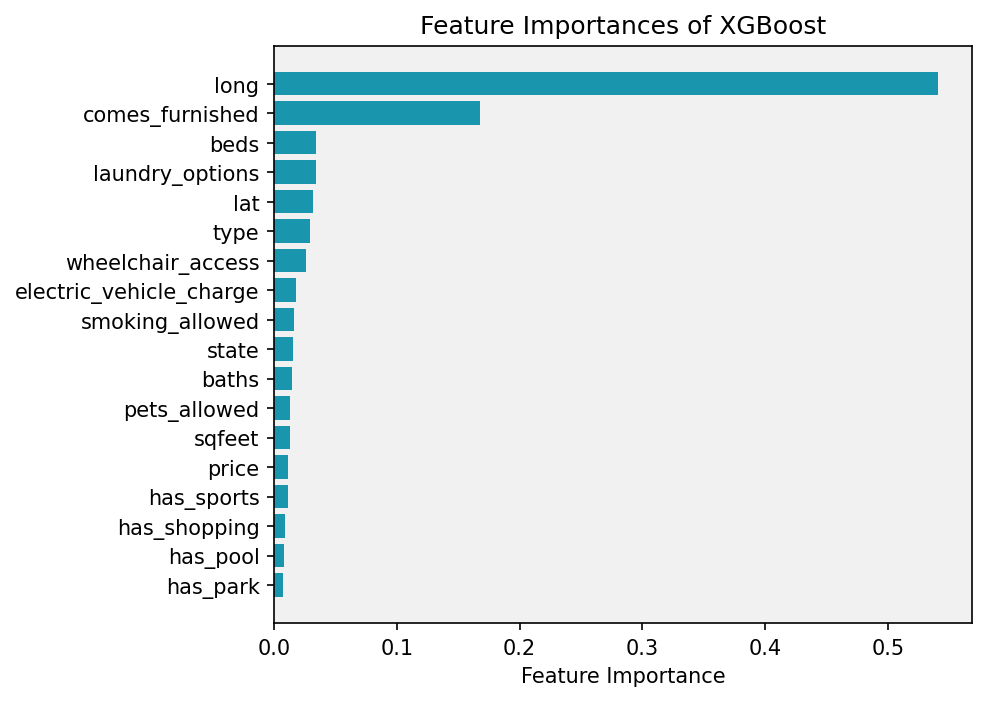

In [0]:
importances = pd.Series({i:j for i,j in zip(train.columns, xgb.feature_importances_)}).sort_values()

fig, ax = plt.subplots(figsize=(6,5), dpi=150)
ax.set_facecolor("#f1f1f2")

plt.barh(importances.index, importances.values, color="#1995ad")
plt.title("Feature Importances of XGBoost")
plt.xlabel("Feature Importance");

## Results

In [0]:
pd.DataFrame(model_scores, index=["RMSE", "MAPE", "R2"])

,ElasticNet,SVR,KNN,DecisionTree,RandomForest,AdaBoost,XGBoost
RMSE,288.246683,292.152873,261.245114,179.380754,133.461037,297.025341,135.396465
MAPE,0.200941,0.185392,0.164148,0.074001,0.062507,0.225681,0.077145
R2,0.533674,0.520950,0.616949,0.819402,0.900030,0.504837,0.897109


In [0]:
results = pd.DataFrame(model_scores, index=["RMSE", "MAPE", "R2"]).T
results

,RMSE,MAPE,R2
ElasticNet,288.246683,0.200941,0.533674
SVR,292.152873,0.185392,0.520950
KNN,261.245114,0.164148,0.616949
DecisionTree,179.380754,0.074001,0.819402
RandomForest,133.461037,0.062507,0.900030
AdaBoost,297.025341,0.225681,0.504837
XGBoost,135.396465,0.077145,0.897109


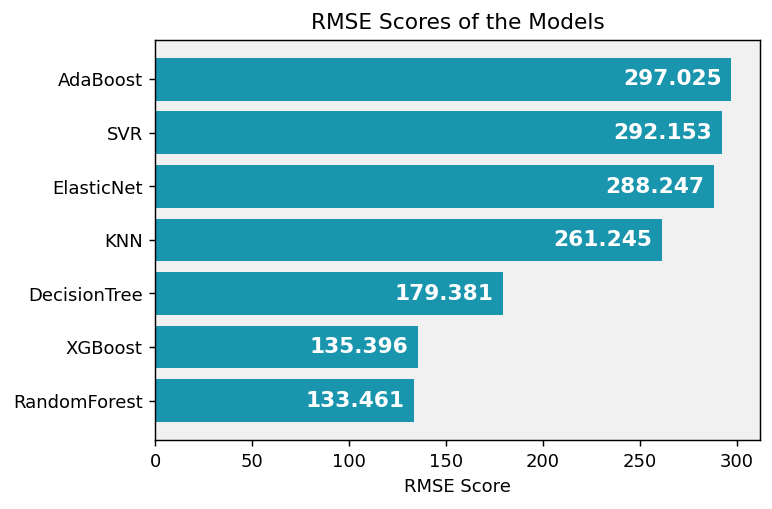

In [0]:
fig, ax = plt.subplots(figsize=(6,4), dpi=130)
ax.set_facecolor("#f1f1f2")

viz_result = results["RMSE"].sort_values()
plt.barh(viz_result.index, viz_result.values, color="#1995ad")
plt.title("RMSE Scores of the Models")
plt.xlabel("RMSE Score")

for i, value in enumerate(viz_result):
    plt.text(value-5, i, f"{value:.3f}", va="center", ha="right", weight="bold", c="white", fontsize="large")

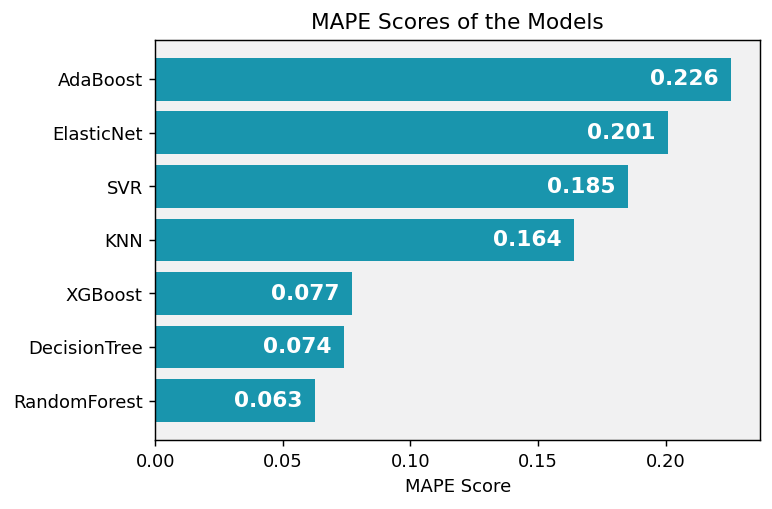

In [0]:
fig, ax = plt.subplots(figsize=(6,4), dpi=130)
ax.set_facecolor("#f1f1f2")

viz_result = results["MAPE"].sort_values()
plt.barh(viz_result.index, viz_result.values, color="#1995ad")
plt.title("MAPE Scores of the Models")
plt.xlabel("MAPE Score")

for i, value in enumerate(viz_result):
    plt.text(value-.005, i, f"{value:.3f}", va="center", ha="right", weight="bold", c="white", fontsize="large")

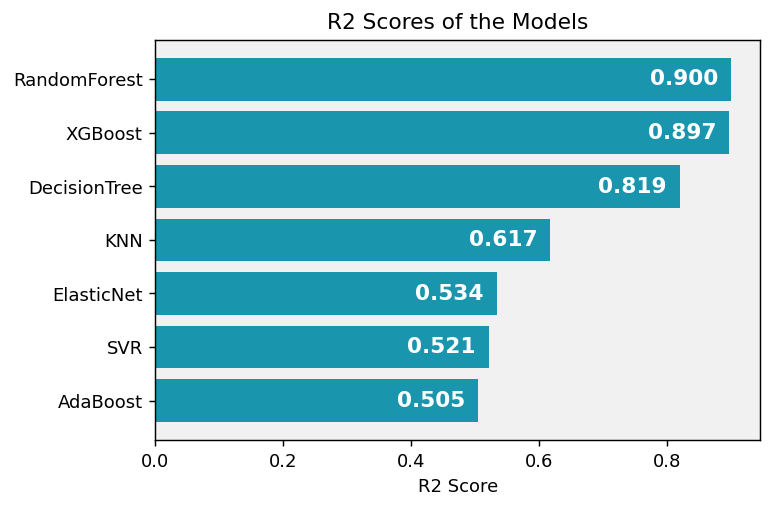

In [0]:
fig, ax = plt.subplots(figsize=(6,4), dpi=130)
ax.set_facecolor("#f1f1f2")

viz_result = results["R2"].sort_values()
plt.barh(viz_result.index, viz_result.values, color="#1995ad")
plt.title("R2 Scores of the Models")
plt.xlabel("R2 Score")

for i, value in enumerate(viz_result):
    plt.text(value-.02, i, f"{value:.3f}", va="center", ha="right", weight="bold", c="white", fontsize="large")